# Trabalho 01 - Classificador Limiar
#### Marrielly Chrystina Martines



Nesta atividade, o objetivo é criar um classificador binário por
Limiar utilizando o conjunto de dados '*iris_2class.csv*', que contém duas classes ou espécies de flores, '*virginica*' e '*versicolor*', e 4 medidas diferentes de flores, incluindo '**sepal length (cm)**', '**sepal width (cm)**', '**petal length (cm)**' e '**petal width (cm)**'. 

Para desenvolver esse classificador, é necessário fazer uma análise dos dados do conjunto de dados para identificar a característica que melhor separa as classes presentes. O classificador binário irá separar as flores em duas classes distintas, com base em um determinado limiar, que será definido pela característica selecionada.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [101]:
df = pd.read_csv('iris_2class.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


## Estatísticas Descritivas

Antes de continuar o processamento dos dados, é importante utilizar a técnica de estatística descritiva para analisar e compreender as informações de entrada. Essa técnica calcula medidas de centralidade, como a média e a mediana, e medidas de dispersão, como o desvio padrão e a variância, que são fundamentais para entender a distribuição dos dados e identificar valores atípicos ou então *outliers*.

In [102]:
df.groupby('especie').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
especie                                                                    
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                \
                      count   mean       std  min    25%  50%    75%  max   
especie                                                                     
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal length (cm)                                               \
                       count   mean       std  min  25%   50%    75%  max   
especie                                                                     
versicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
especie                                                                
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

Nota-se, a partir dos histogramas acima, que os atributos **sepal length (cm)** e **sepal width (cm)** apresentam uma grande sobreposição, o que indica que esses atributos podem não ser adequados para classificar as classes versicolor e virginica. Em contrapartida, os atributos **petal length (cm)** e **petal width (cm)** não se sobrepõem tanto, mostrando serem atributos mais promissores para a criação de um scatterplot.

## Histogramas

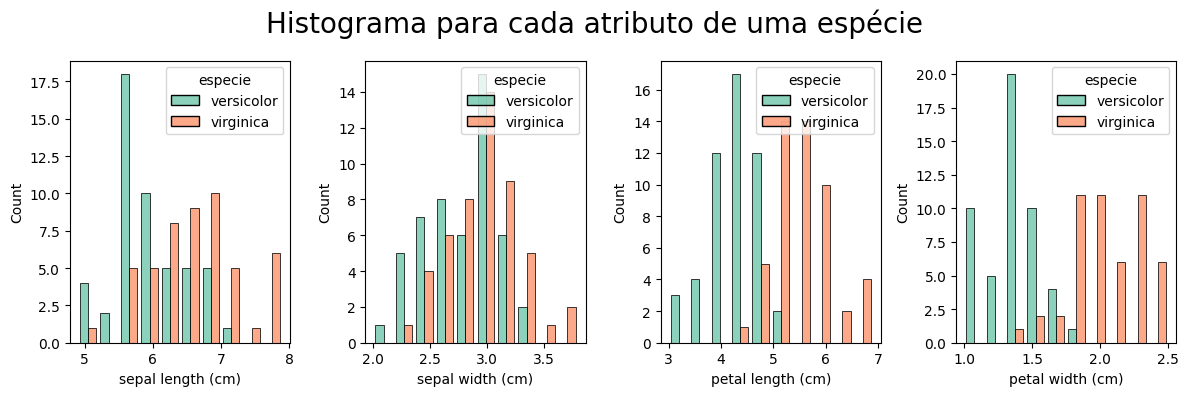

In [103]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4))

fig.suptitle('Histograma para cada atributo de uma espécie', fontsize=20)

sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axs[0],  palette='Set2')
sns.histplot(data=df, bins=10, x='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axs[1], palette='Set2')
sns.histplot(data=df, bins=10, x='petal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axs[2], palette='Set2')
sns.histplot(data=df, bins=10, x='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axs[3], palette='Set2')

fig.tight_layout()


Os histogramas de cada atributo utilizado na definição das espécies estão apresentados acima. A finalidade da elaboração desses gráficos é examinar as diferenças existentes entre as características, com o objetivo de identificar aquelas que apresentam valores discrepantes para cada espécie, evidenciando pouca sobreposição, como é o caso do '**petal length (cm)**' e do '**petal width (cm)**', como já previsto anteriormente. A análise desses atributos sugere que eles são boas opções para a realização da classificação por meio de limiares.

## Scatterplots

Como visto anteriormente, os atributos '**petal length (cm)**' e '**petal width (cm)**' se apresentam como os mais promissores. Diante disso, é possível plotar o diagrama de dispersão, também conhecido como *scatterplot*, com o intuito de se obter uma melhor compreensão sobre a segregação entre as duas espécies apresentadas.

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

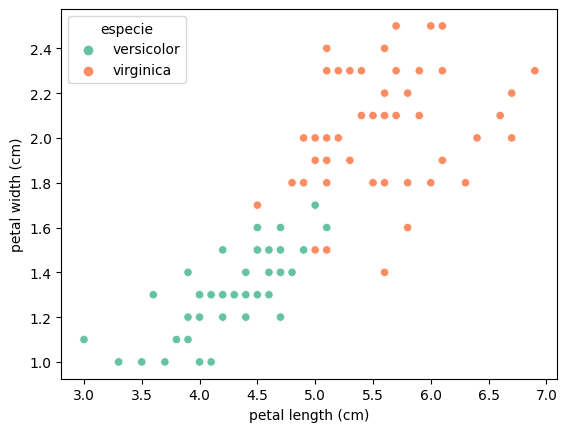

In [104]:
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie', palette='Set2')

Ao observar o gráfico acima, pode-se concluir que o atributo '**petal width**' se mostra como a opção mais apropriada para a realização da classificação das classes 'versicolor' e 'virginica'. Ainda, é possível notar que uma separação das duas classes se dá por volta do limiar de valor 1.65. Sendo assim, é possível traçar uma linha que representará este limiar. 

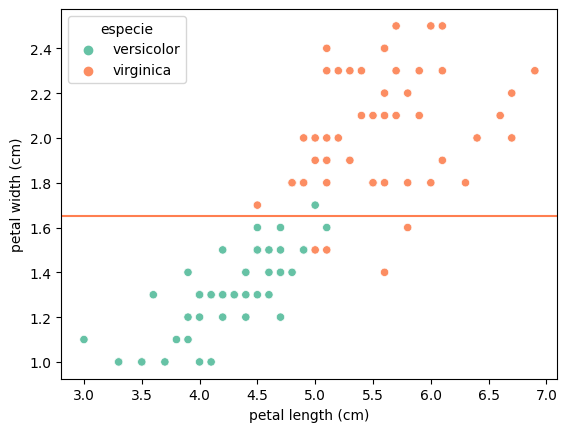

In [105]:
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie', palette='Set2')
plt.axhline(1.65, color='coral', label='Limiar') 

## Classificador Limiar

Cria-se uma função auxiliar para o armazenamento das predições, tendo como parâmetros o valor do limiar, a base de dados, a coluna do dataset que será utilizada, e os rótulos, que por padrão estão como 'versicolor' e 'virginica', as duas classes encontradas no dataset utilizado.

In [106]:
def classificador_limiar(limiar, dados, coluna, rotulos=['versicolor', 'virginica']):
  predicoes = []
  for idx, dado in dados.iterrows():
    if dado[coluna] < limiar:
      predicoes.append(rotulos[0])
    else:
      predicoes.append(rotulos[1])
  return predicoes

In [107]:
pred = classificador_limiar(1.65, df, 'petal width (cm)')
pred

['versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',


In [108]:
for gab, p, in zip(df['especie'].values, pred):
  print(gab, p)

versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor virginica
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor virginica
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor v

Aqui foi feito uma comparação entre o gabarito, ou seja, o que de fato a amostra é, e as predições feitas utilizando a função auxiliar. É possível notar algumas predições que não condizem com o que é mostrado no gabarito.

## Busca Exaustiva

O objetivo desta etapa é maximizar a acurácia do conjunto de dados. Para isso, será utilizada a técnica da busca exaustiva, que consiste em examinar todos os possíveis candidatos para a solução do problema e avaliar se cada um satisfaz as condições especificadas. 

In [118]:
def busca_exaustiva(n_limiares, dados):
  limiares = np.linspace(df['petal width (cm)'].min(), df['petal width (cm)'].max(), n_limiares)
  acuracias = []

  melhor_limiar = limiares[0]
  melhor_acuracia = 0

  for limiar in limiares:
    predicoes = classificador_limiar(limiar, df, 'petal width (cm)')
    acuracia = accuracy_score(df['especie'], predicoes)
    acuracias.append(acuracia)

    if acuracia > melhor_acuracia:
      melhor_acuracia = acuracia
      melhor_limiar = limiar

  return melhor_limiar, melhor_acuracia


Aqui serão testados 100 limiares e, ao final, será apresentado o melhor limiar e a melhor acurácia encontrados.

In [120]:
melhor_limiar, melhor_acuracia = busca_exaustiva(100, df)

print(' Melhor Limiar: %.3f\n Melhor Acurácia: %.3f' % (melhor_limiar, melhor_acuracia))

 Melhor Limiar: 1.606
 Melhor Acurácia: 0.940


Para melhor visualização, abaixo tem-se um gráfico de linhas que apresenta as acurácias (eixo y) para diferentes valores de limiar (eixo x).

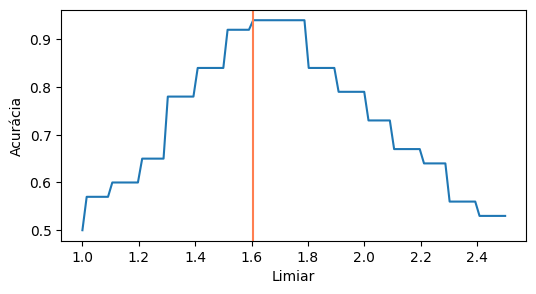

In [121]:
fig, axes = plt.subplots(figsize=(6,3))
axes.set_xlabel('Limiar')
axes.set_ylabel('Acurácia')
plt.plot(limiares, acuracias)
plt.axvline(melhor_limiar, color="coral")

### Treino e Teste

Agora será realizado a busca exaustiva utilizando 20 particionamentos diferentes, tendo 80% dos dados separados para o conjunto de treino e 20% para o conjunto de teste. Ao final, será reportado a acurácia máxima, mínima média e o desvio padrão.

 Melhor Limiar: 1.606
 Acurácia Máxima: 0.963
 Acurácia Mínima: 0.925
 Acurácia Média: 0.939
 Desvio Padrão: 0.011 



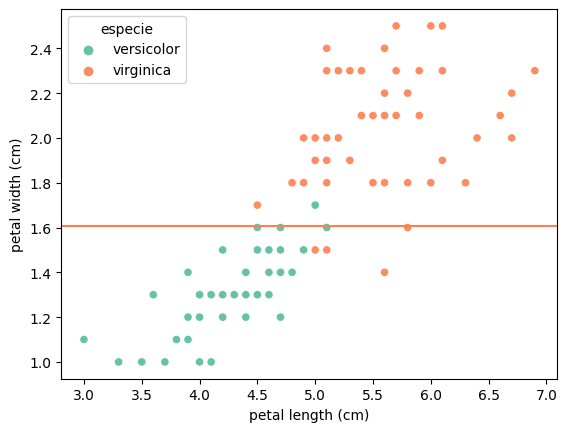

In [125]:
import random

seeds = [random.randint(10, 1000) for i in range(20)]
resultados = []

for seed in seeds:
    x_teste, x_treino, y_teste, y_treino = train_test_split(df[['petal width (cm)']], 
                                                            df['especie'], 
                                                            test_size=0.2, 
                                                            stratify=df['especie'].tolist(),
                                                            shuffle=True, 
                                                            random_state=(seed*1000))
    dtreino = x_treino
    dtreino['especie'] = y_treino
    melhor_limiar, _ = busca_exaustiva(100, dtreino)
    classificacao_teste = classificador_limiar(melhor_limiar, x_teste, 'petal width (cm)')
    acuracia_teste = accuracy_score(y_teste, classificacao_teste)
    resultados.append((melhor_limiar, acuracia_teste))

## Reporta a acurácia máxima e mínima e calcule a acurácia média e o desvio padrão.
acuracias = np.array([resultado[1] for resultado in resultados])
acuracia_max = np.max(acuracias)
acuracia_min = np.min(acuracias)
acuracia_media = np.mean(acuracias)
desvio_padrao = np.std(acuracias)
melhor_limiar = resultados[acuracias.argmax()][0]

print(' Melhor Limiar: %.3f' % (melhor_limiar))
print(' Acurácia Máxima: %.3f\n Acurácia Mínima: %.3f' % (acuracia_max, acuracia_min))
print(' Acurácia Média: %.3f\n Desvio Padrão: %.3f \n' % (acuracia_media, desvio_padrao))

## Monta o scatterplot
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie', palette='Set2')
plt.axhline(melhor_limiar, color='coral', label='Limiar') 
